# DeeperForensics-1.0 Dataset Sampling


This notebook is used to sample the full [DeeperForensics-1.0](https://github.com/EndlessSora/DeeperForensics-1.0) dataset for deepfake detection research purposes. Sample data of 100 deepfakes and 100 real videos are extracted to be 100 frames for each video, resulting in a total of 20,000 frames of image.

The real videos are retrieved from [FaceForensics++](https://github.com/ondyari/FaceForensics) dataset since DeeperForensics use the refined YouTube videos collected by [FaceForensics++](https://github.com/ondyari/FaceForensics) as mentioned in their [GitHub document page](https://github.com/EndlessSora/DeeperForensics-1.0/tree/master/dataset#target-videos).


In [1]:
import os
import csv
import random
import shutil
import cv2
import matplotlib.pyplot as plt

In [3]:
DEEPFAKE_DIR = (
    "/mnt/e/datasets/DeeperForensics-1.0/manipulated_videos/reenact_postprocess"
)
ORIGINAL_VID_DIR = (
    "/mnt/e/datasets/FaceForensics++/original_sequences/youtube/c23/videos"
)

SAMPLE_DIR = "/mnt/e/samples/videos/DeeperForensics++"
SAMPLE_DEEPFAKE_DIR = os.path.join(SAMPLE_DIR, "Deepfake")
SAMPLE_ORIGINAL_VID_DIR = os.path.join(SAMPLE_DIR, "Original")

SAMPLE_FRAMES_DIR = "/mnt/e/samples/frames/DeeperForensics++"
SAMPLE_FRAMES_DEEPFAKE_DIR = os.path.join(SAMPLE_FRAMES_DIR, "Deepfake")
SAMPLE_FRAMES_ORIGINAL_VID_DIR = os.path.join(SAMPLE_FRAMES_DIR, "Original")

SAMPLE_LIST_PATH = "deeperforensics-1.0-list.csv"

SAMPLE_SIZE = 100
EXTRACTED_FRAME_SIZE = 100

## Video Sampling


### Sample Real Videos


In [19]:
sample_original_vids = random.sample(os.listdir(ORIGINAL_VID_DIR), SAMPLE_SIZE)
print(f"Sampled {len(sample_original_vids)} original video files")

Sampled 100 original video files


### Sample Deepfakes

Each deepfake sample is chosen by taking manipulated videos based on the original video samples.


In [27]:
def extract_original_deepfake_filename(deepfake_filename):
    splitted = deepfake_filename.split("_")
    file_extension = os.path.splitext(deepfake_filename)[-1]
    return splitted[0] + file_extension

In [36]:
deepfakes = os.listdir(DEEPFAKE_DIR)
sample_deepfakes = []

for original_filename in sample_original_vids:
    for deepfake_filename in deepfakes:
        extracted_original_filename = extract_original_deepfake_filename(
            deepfake_filename
        )
        if extracted_original_filename == original_filename:
            sample_deepfakes.append(deepfake_filename)
            break

print(
    f"Sampled {len(sample_deepfakes)} deepfake files based on the sample original videos"
)

Sampled 100 deepfake files based on the sample original videos


### Define Each Sample's File Path


In [47]:
sample_original_vid_files = list(
    map(lambda filename: os.path.join(ORIGINAL_VID_DIR, filename), sample_original_vids)
)
sample_deepfake_files = list(
    map(lambda filename: os.path.join(DEEPFAKE_DIR, filename), sample_deepfakes)
)

print("Sample original video:")
print(sample_original_vid_files[0])
print("\nSample deepfake:")
print(sample_deepfake_files[0])

Sample original video:
/mnt/e/datasets/FaceForensics++/original_sequences/youtube/c23/videos/651.mp4

Sample deepfake:
/mnt/e/datasets/DeeperForensics-1.0/manipulated_videos/reenact_postprocess/651_W010.mp4


### Copy Sample to a Separate Directory


In [45]:
for file_path in sample_original_vid_files:
    if os.path.isfile(file_path):
        shutil.copy(file_path, SAMPLE_ORIGINAL_VID_DIR)

In [46]:
for file_path in sample_deepfake_files:
    if os.path.isfile(file_path):
        shutil.copy(file_path, SAMPLE_DEEPFAKE_DIR)

### Create CSV File to List Sample Video Files


In [55]:
with open(SAMPLE_LIST_PATH, "w", newline="") as sample_list_file:
    header = ["file", "label"]
    writer = csv.writer(sample_list_file)
    writer.writerow(header)

    for filename in sample_deepfake_files:
        dataset_path = filename.split("/")[-4:]
        writer.writerow(["/".join(dataset_path), "deepfake"])

    for filename in sample_original_vid_files:
        dataset_path = filename.split("/")[-6:]
        writer.writerow(["/".join(dataset_path), "real"])

    print(f"Sample videos filepath list generated in {SAMPLE_LIST_PATH}")

Sample videos filepath list generated in deeperforensics-1.0-list.csv


## Extract Sample Video Frames


### Extract Deepfakes and Real Vids Frames


In [56]:
def extract_frames(video_path, output_dir, num_frames=100):
    cap = cv2.VideoCapture(video_path)

    num_frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if num_frames_total <= num_frames:
        frame_interval = 1
    else:
        frame_interval = int(num_frames_total / num_frames)

    frames = []
    count = 1

    video_filename = video_path.split("/")[-1]
    print(f"Extracting {video_filename}")
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        if count % frame_interval == 0:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
            filename, _ = os.path.splitext(video_path)
            filename = filename.split("/")[-1]
            frame_count = int(count / frame_interval)
            cv2.imwrite(
                os.path.join(output_dir, f"{filename}-{frame_count}.jpg"),
                frame,
            )
            if frame_count == 100:
                break

        count += 1

    print("=> Extraction finished\n")

    cap.release()

In [65]:
for filename in os.listdir(SAMPLE_ORIGINAL_VID_DIR):
    file_path = os.path.join(SAMPLE_ORIGINAL_VID_DIR, filename)
    extract_frames(file_path, SAMPLE_FRAMES_ORIGINAL_VID_DIR)

Extracting 008.mp4
=> Extraction finished

Extracting 017.mp4
=> Extraction finished

Extracting 019.mp4
=> Extraction finished

Extracting 024.mp4
=> Extraction finished

Extracting 039.mp4
=> Extraction finished

Extracting 054.mp4
=> Extraction finished

Extracting 057.mp4
=> Extraction finished

Extracting 065.mp4
=> Extraction finished

Extracting 083.mp4
=> Extraction finished

Extracting 120.mp4
=> Extraction finished

Extracting 121.mp4
=> Extraction finished

Extracting 132.mp4
=> Extraction finished

Extracting 142.mp4
=> Extraction finished

Extracting 163.mp4
=> Extraction finished

Extracting 174.mp4
=> Extraction finished

Extracting 177.mp4
=> Extraction finished

Extracting 178.mp4
=> Extraction finished

Extracting 180.mp4
=> Extraction finished

Extracting 185.mp4
=> Extraction finished

Extracting 188.mp4
=> Extraction finished

Extracting 193.mp4
=> Extraction finished

Extracting 205.mp4
=> Extraction finished

Extracting 218.mp4
=> Extraction finished

Extracting 

In [67]:
for filename in os.listdir(SAMPLE_DEEPFAKE_DIR):
    file_path = os.path.join(SAMPLE_DEEPFAKE_DIR, filename)
    extract_frames(file_path, SAMPLE_FRAMES_DEEPFAKE_DIR)

Extracting 008_W101.mp4
=> Extraction finished

Extracting 017_W006.mp4
=> Extraction finished

Extracting 019_W007.mp4
=> Extraction finished

Extracting 024_M113.mp4
=> Extraction finished

Extracting 039_M114.mp4
=> Extraction finished

Extracting 054_M117.mp4
=> Extraction finished

Extracting 057_W012.mp4
=> Extraction finished

Extracting 065_W005.mp4
=> Extraction finished

Extracting 083_W015.mp4
=> Extraction finished

Extracting 120_W021.mp4
=> Extraction finished

Extracting 121_W021.mp4
=> Extraction finished

Extracting 132_W023.mp4
=> Extraction finished

Extracting 142_W025.mp4
=> Extraction finished

Extracting 163_M005.mp4
=> Extraction finished

Extracting 174_W029.mp4
=> Extraction finished

Extracting 177_W133.mp4
=> Extraction finished

Extracting 178_W133.mp4
=> Extraction finished

Extracting 180_M007.mp4
=> Extraction finished

Extracting 185_M008.mp4
=> Extraction finished

Extracting 188_W031.mp4
=> Extraction finished

Extracting 193_W032.mp4
=> Extraction fi

### Preview Extracted Video Frames


In [68]:
NUM_PREVIEW_IMAGES = 20
NUM_ROWS = 5
NUM_COLS = NUM_PREVIEW_IMAGES // NUM_ROWS

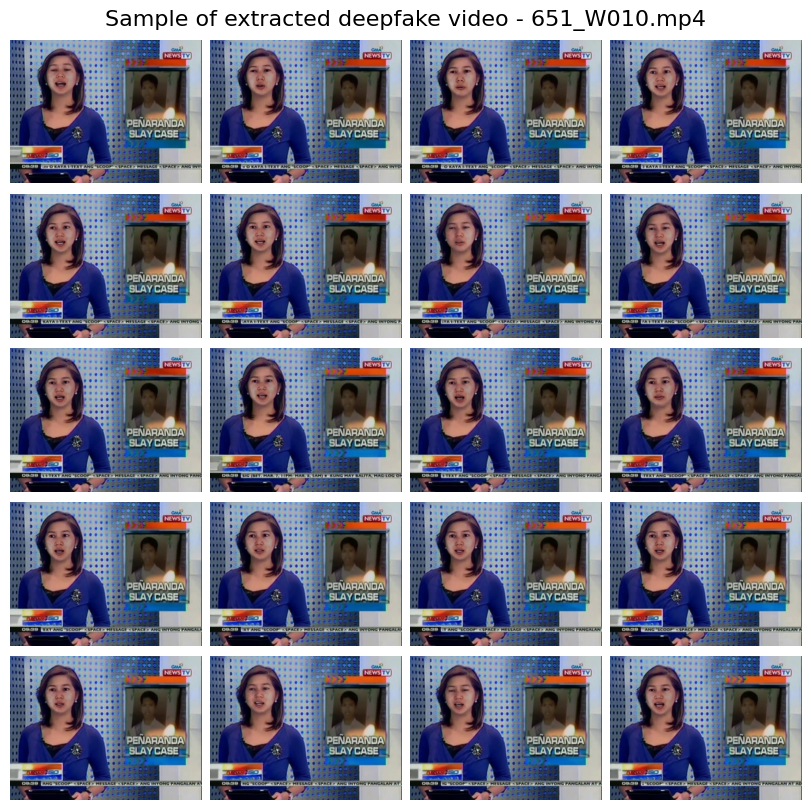

In [76]:
frame_files = [
    os.path.join(SAMPLE_FRAMES_DEEPFAKE_DIR, filename)
    for filename in os.listdir(SAMPLE_FRAMES_DEEPFAKE_DIR)[-NUM_PREVIEW_IMAGES:]
]
filename = sample_deepfakes[0].split("/")[-1]

fig, axs = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(8, 8), constrained_layout=True)
fig.suptitle(f"Sample of extracted deepfake video - {filename}", fontsize=16)

for i, ax in enumerate(axs.flatten()):
    img = plt.imread(frame_files[i])
    ax.imshow(img)
    ax.axis("off")

plt.show()